In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import sem, t
import matplotlib.patches as mpatches


In [26]:
ruta = "results/validation_gaps/__VALIDATION_ROBUSTNESS_AND_ERRORS/global_robustness.csv"

In [27]:
# Cargar datos
df = pd.read_csv(ruta)


In [19]:
!pip install openpyxl

In [28]:

# Agrupaciones necesarias
grouped = df.groupby('mutation_name')['error_rate']
means = grouped.mean()
counts = grouped.count()
sems = grouped.apply(sem)
t_crit = t.ppf(0.975, df=counts - 1)  # Intervalo de confianza 95 %

# Calcular estadísticas y redondear
summary_stats = grouped.agg(
    min_error_rate='min',
    max_error_rate='max',
    mean_error_rate='mean',
    std_error_rate='std'
).round(4).reset_index()

# Mostrar tabla
print(summary_stats)
summary_stats.to_csv("results/validation_gaps/__VALIDATION_ROBUSTNESS_AND_ERRORS/global_robustness_avg_std.csv", index=False)
summary_stats.to_excel("results/validation_gaps/__VALIDATION_ROBUSTNESS_AND_ERRORS/global_robustness_avg_std.xlsx", index=False)

              mutation_name  min_error_rate  max_error_rate  mean_error_rate  \
0        a_lot_faster_tempo          0.0000          0.7121           0.1919   
1        a_lot_slower_tempo          0.0000          0.6765           0.2022   
2               accelerando          0.0833          0.8590           0.4817   
3   articulated_accentuated          0.0000          0.5526           0.0424   
4        articulated_legato          0.0000          0.8305           0.1424   
5      articulated_staccato          0.0000          0.7857           0.1514   
6              faster_tempo          0.0000          0.6500           0.1257   
7         note_cut_too_soon          0.0000          0.5714           0.0687   
8        note_held_too_long          0.0000          0.5526           0.0429   
9               pitch_shift          0.0000          0.5600           0.0518   
10               ritardando          0.0263          0.8778           0.5421   
11             slower_tempo          0.0

<Figure size 1200x600 with 0 Axes>

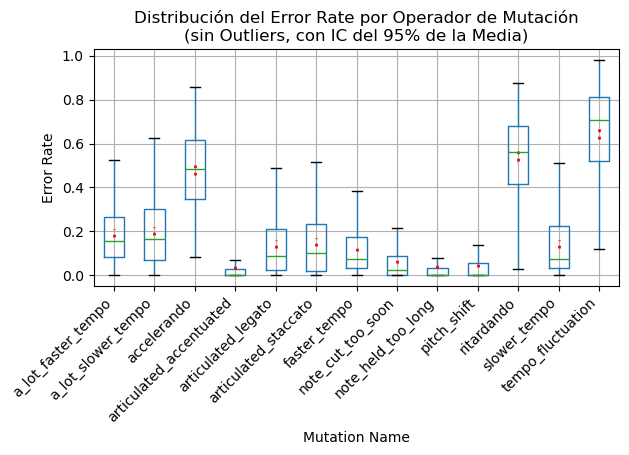

In [29]:

# Crear boxplot con pandas sin outliers
plt.figure(figsize=(12, 6))
ax = df.boxplot(column='error_rate', by='mutation_name', showfliers=False, grid=True)

# Añadir intervalos de confianza de la media
for i, (mutation, mean) in enumerate(means.items()):
    margin = sems[mutation] * t_crit[i]
    ax.vlines(i + 1, mean - margin, mean + margin, colors='red', linestyles=':', linewidth=2)

# Estética del gráfico
plt.suptitle('')
plt.title('Distribución del Error Rate por Operador de Mutación\n(sin Outliers, con IC del 95% de la Media)')
plt.xlabel('Mutation Name')
plt.ylabel('Error Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


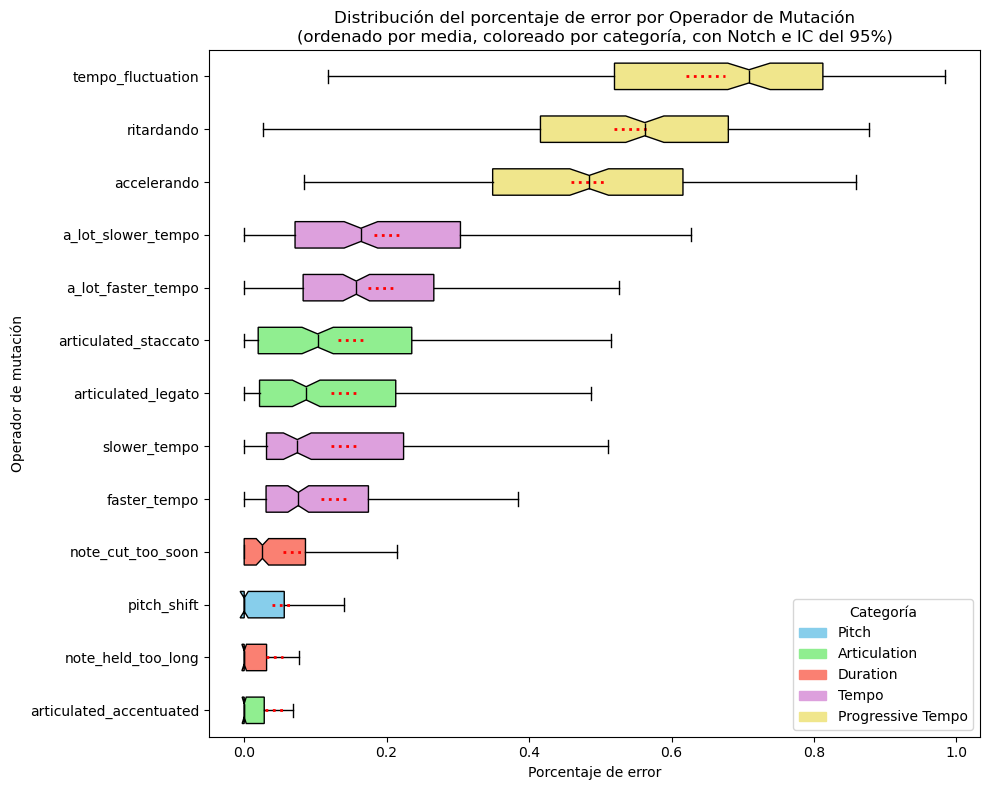

In [30]:
# Cargar datos
df = pd.read_csv(ruta)

# Calcular estadísticas por operador
means = df.groupby('mutation_name')['error_rate'].mean()
counts = df.groupby('mutation_name')['error_rate'].count()
sems = df.groupby('mutation_name')['error_rate'].apply(sem)
t_crit = pd.Series(t.ppf(0.975, df=counts - 1), index=counts.index)

# Ordenar operadores por media de error (de menor a mayor)
means_sorted = means.sort_values()
mutation_order = means_sorted.index.tolist()

# Preparar datos en ese orden
data_ordered = [df[df['mutation_name'] == m]['error_rate'].values for m in mutation_order]

# Mapear categorías a colores
category_colors = {
    'pitch': 'skyblue',
    'articulation': 'lightgreen',
    'duration': 'salmon',
    'tempo': 'plum',
    'progressive_tempo': 'khaki'
}

# Crear mapa de operador -> categoría
mutation_to_category = df.drop_duplicates('mutation_name').set_index('mutation_name')['category'].to_dict()
colors = [category_colors[mutation_to_category[m]] for m in mutation_order]

# Crear figura
fig, ax = plt.subplots(figsize=(10, 8))

# Dibujar boxplot
box = ax.boxplot(
    data_ordered,
    vert=False,
    notch=True,
    patch_artist=True,
    showfliers=False,
    boxprops=dict(facecolor='white'),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black'),
    medianprops=dict(color='black')
)

# Colorear cada caja según la categoría
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')

# Añadir líneas rojas del IC del 95% de la media
for i, mutation in enumerate(mutation_order):
    mean = means[mutation]
    margin = sems[mutation] * t_crit[mutation]
    ax.hlines(i + 1, mean - margin, mean + margin, colors='red', linestyles=':', linewidth=2)

# Etiquetas y estilo
ax.set_yticks(range(1, len(mutation_order) + 1))
ax.set_yticklabels(mutation_order)
ax.set_title('Distribución del porcentaje de error por Operador de Mutación\n(ordenado por media, coloreado por categoría, con Notch e IC del 95%)')
ax.set_xlabel('Porcentaje de error')
ax.set_ylabel('Operador de mutación')

# Añadir leyenda
legend_patches = [mpatches.Patch(color=color, label=cat.replace('_', ' ').title()) for cat, color in category_colors.items()]
ax.legend(handles=legend_patches, title='Categoría', loc='lower right')

plt.tight_layout()
plt.show()


In [32]:

# Calcular estadísticas por operador
means = df.groupby('mutation_name')['error_rate'].mean()
counts = df.groupby('mutation_name')['error_rate'].count()
sems = df.groupby('mutation_name')['error_rate'].apply(sem)
t_crit = pd.Series(t.ppf(0.975, df=counts - 1), index=counts.index)

# Ordenar operadores por media de error (de menor a mayor)
means_sorted = means.sort_values()
mutation_order = means_sorted.index.tolist()

# Mapear cada operador a su categoría
mutation_to_category = df.drop_duplicates('mutation_name').set_index('mutation_name')['category'].to_dict()

# Colores por categoría (ajustados)
category_colors = {
    'pitch': 'skyblue',
    'articulation': 'lightgreen',
    'duration': 'moccasin',           # naranja más claro
    'tempo': 'thistle',               # morado claro
    'progressive_tempo': 'khaki'
}

# Preparar datos en orden descendente
mutation_order_reversed = mutation_order[::-1]
data_ordered_reversed = [df[df['mutation_name'] == m]['error_rate'].values for m in mutation_order_reversed]
colors_reversed = [category_colors[mutation_to_category[m]] for m in mutation_order_reversed]

# Recalcular t_crit con índices correctos
t_crit_indexed = pd.Series(t.ppf(0.975, df=counts - 1), index=counts.index)


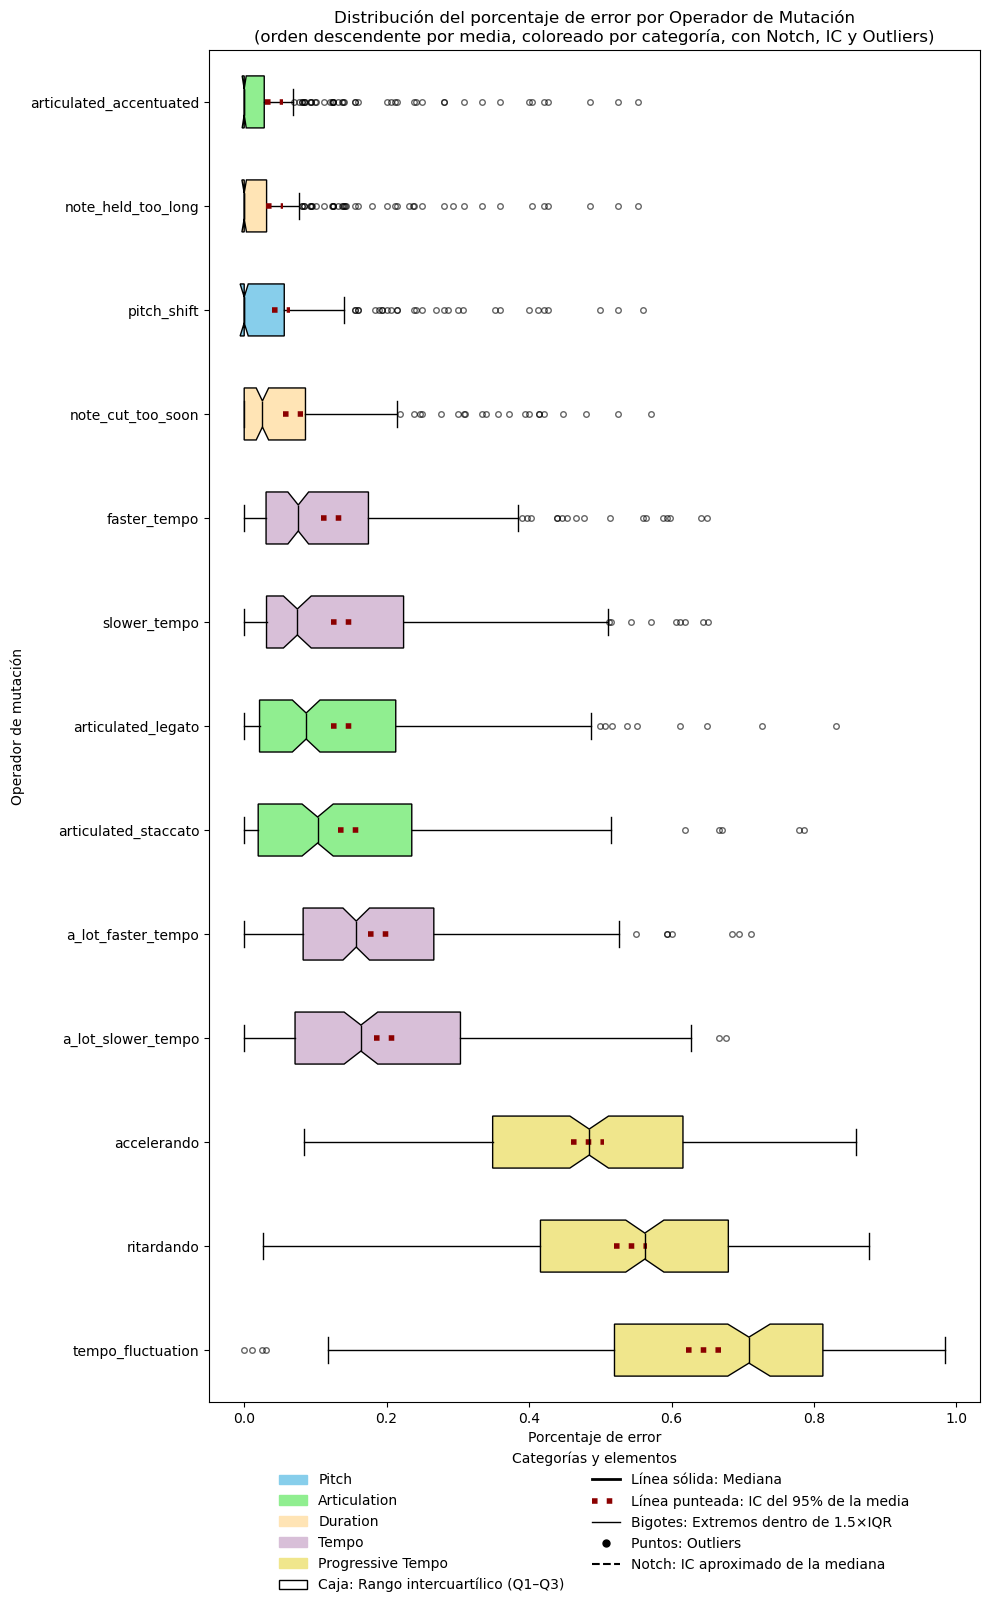

In [34]:
# Crear figura más alta y más compacta horizontalmente
fig, ax = plt.subplots(figsize=(10, 16))

# Dibujar boxplot
box = ax.boxplot(
    data_ordered_reversed,
    vert=False,
    notch=True,
    patch_artist=True,
    showfliers=True,
    boxprops=dict(facecolor='white'),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black'),
    medianprops=dict(color='black'),
    flierprops=dict(marker='o', color='black', markersize=4, alpha=0.6)
)

# Colorear cada caja según la categoría
for patch, color in zip(box['boxes'], colors_reversed):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')

# Añadir líneas de IC del 95% de la media (color visible, más grosor)
for i, mutation in enumerate(mutation_order_reversed):
    mean = means[mutation]
    margin = sems[mutation] * t_crit_indexed[mutation]
    ax.hlines(i + 1, mean - margin, mean + margin, colors='darkred', linestyles=':', linewidth=4)

# Etiquetas y estilo
ax.set_yticks(range(1, len(mutation_order_reversed) + 1))
ax.set_yticklabels(mutation_order_reversed)
ax.set_xlabel('Porcentaje de error')
ax.set_ylabel('Operador de mutación')

# Título principal
ax.set_title(
    'Distribución del porcentaje de error por Operador de Mutación\n'
    '(orden descendente por media, coloreado por categoría, con Notch, IC y Outliers)',
    loc='center'
)

# Leyendas
legend_patches_category = [
    mpatches.Patch(color=color, label=cat.replace('_', ' ').title())
    for cat, color in category_colors.items()
]
legend_elements = [
    mpatches.Patch(facecolor='white', edgecolor='black', label='Caja: Rango intercuartílico (Q1–Q3)'),
    plt.Line2D([0], [0], color='black', linewidth=2, label='Línea sólida: Mediana'),
    plt.Line2D([0], [0], color='darkred', linestyle=':', linewidth=4, label='Línea punteada: IC del 95% de la media'),
    plt.Line2D([0], [0], color='black', linestyle='-', linewidth=1, label='Bigotes: Extremos dentro de 1.5×IQR'),
    plt.Line2D([0], [0], marker='o', color='black', linestyle='None', markersize=5, label='Puntos: Outliers'),
    plt.Line2D([0], [0], color='black', linestyle='--', label='Notch: IC aproximado de la mediana')
]

combined_legend = legend_patches_category + legend_elements

# Posicionar la leyenda debajo del eje X
ax.legend(
    handles=combined_legend,
    title='Categorías y elementos',
    loc='lower center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=2,
    frameon=False
)

plt.tight_layout()
plt.savefig("box_plot_validation.pdf", format='pdf')
plt.show()


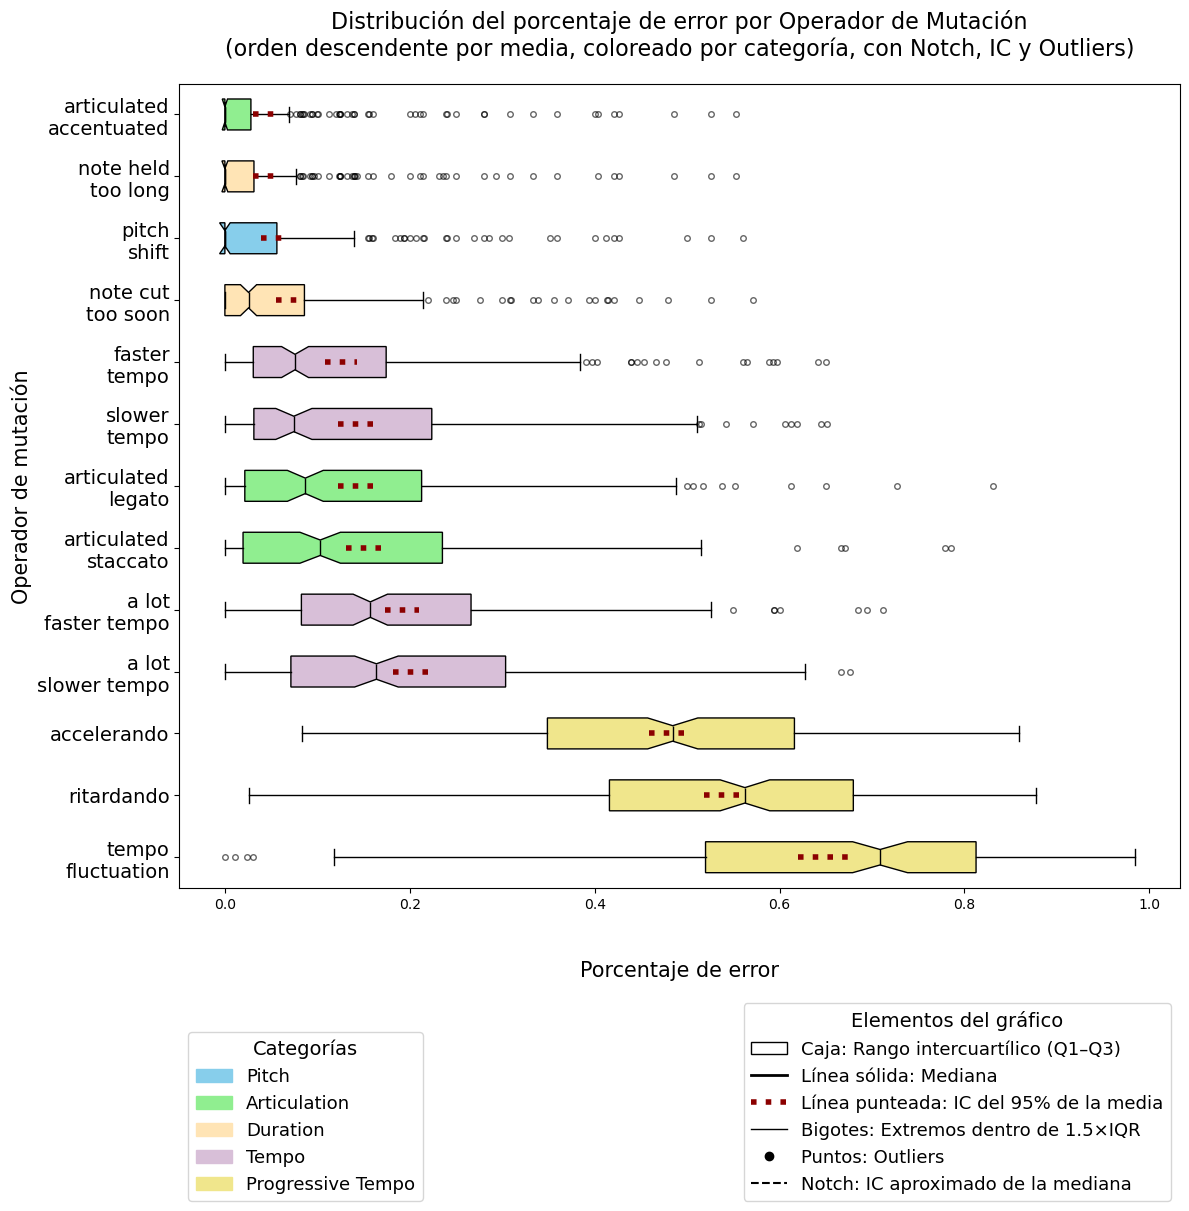

In [35]:
# Función para envolver etiquetas con reglas específicas:
# - Si hay 2 palabras: separarlas en 2 líneas (1 palabra por línea)
# - Si hay 4 palabras: separarlas en 2 líneas (2 y 2)
# - Para otros casos: agrupar de 2 en 2, y la última línea puede tener 1 si es impar
def wrap_label_custom(label):
    words = label.replace('_', ' ').split()
    n = len(words)
    lines = []
    if n == 2:
        lines = words
    elif n == 4:
        lines = [' '.join(words[:2]), ' '.join(words[2:])]
    else:
        i = 0
        while i < n:
            if i + 1 < n:
                lines.append(' '.join(words[i:i + 2]))
                i += 2
            else:
                lines.append(words[i])
                i += 1
    return '\n'.join(lines)

# Aplicar la envoltura personalizada a las etiquetas
ytick_labels_wrapped = [wrap_label_custom(m) for m in mutation_order_reversed]

# Crear figura más ancha para ajustarse a etiquetas agrupadas
fig, ax = plt.subplots(figsize=(12, 13))

# Dibujar boxplot
box = ax.boxplot(
    data_ordered_reversed,
    vert=False,
    notch=True,
    patch_artist=True,
    showfliers=True,
    boxprops=dict(facecolor='white'),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black'),
    medianprops=dict(color='black'),
    flierprops=dict(marker='o', color='black', markersize=4, alpha=0.6)
)

# Colorear las cajas según la categoría
for patch, color in zip(box['boxes'], colors_reversed):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')

# Añadir líneas del IC del 95% de la media
for i, mutation in enumerate(mutation_order_reversed):
    mean = means[mutation]
    margin = sems[mutation] * t_crit_indexed[mutation]
    ax.hlines(i + 1, mean - margin, mean + margin, colors='darkred', linestyles=':', linewidth=4)

# Aplicar etiquetas y estilo
ax.set_yticks(range(1, len(mutation_order_reversed) + 1))
ax.set_yticklabels(ytick_labels_wrapped, fontsize=14)
ax.set_xlabel('Porcentaje de error', fontsize=15, labelpad=35)
ax.set_ylabel('Operador de mutación', fontsize=15)

# Título
ax.set_title(
    'Distribución del porcentaje de error por Operador de Mutación\n'
    '(orden descendente por media, coloreado por categoría, con Notch, IC y Outliers)',
    fontsize=16,
    loc='center',
    pad=20
)

# Leyenda 1: elementos del gráfico
legend1 = ax.legend(
    handles=[
        mpatches.Patch(facecolor='white', edgecolor='black', label='Caja: Rango intercuartílico (Q1–Q3)'),
        plt.Line2D([0], [0], color='black', linewidth=2, label='Línea sólida: Mediana'),
        plt.Line2D([0], [0], color='darkred', linestyle=':', linewidth=4, label='Línea punteada: IC del 95% de la media'),
        plt.Line2D([0], [0], color='black', linestyle='-', linewidth=1, label='Bigotes: Extremos dentro de 1.5×IQR'),
        plt.Line2D([0], [0], marker='o', color='black', linestyle='None', markersize=6, label='Puntos: Outliers'),
        plt.Line2D([0], [0], color='black', linestyle='--', label='Notch: IC aproximado de la mediana')
    ],
    title='Elementos del gráfico',
    loc='lower right',
    bbox_to_anchor=(1, -0.4),
    frameon=True,
    fontsize=13,
    title_fontsize=14
)

# Leyenda 2: categorías
legend2 = ax.legend(
    handles=[mpatches.Patch(color=color, label=cat.replace('_', ' ').title())
             for cat, color in category_colors.items()],
    title='Categorías',
    loc='lower left',
    bbox_to_anchor=(0, -0.4),
    frameon=True,
    fontsize=13,
    title_fontsize=14
)

# Añadir leyenda 1 manualmente
ax.add_artist(legend1)

plt.tight_layout()
plt.savefig("box_plot_validation.pdf", format='pdf')

plt.show()
